**박보현**

Object Detection 과제
- Faster RCNN으로Object Detection 수행



**1) TensorFlow Hub 이용하기**

**가져오기 및 설정**

In [ ]:
# 시스템 명령어 처리
import os
import pathlib

# 이미지 처리
import matplotlib
import matplotlib.pyplot as plt

# 파일 처리
import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

# 텐서플로우 허브
import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

**유틸리티**

In [ ]:
# @title Run this!!

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)


ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

IMAGES_FOR_TEST = {
  'Beach' : 'models/research/object_detection/test_images/image2.jpg',
  'Dogs' : 'models/research/object_detection/test_images/image1.jpg',
  # By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
  'Naxos Taverna' : 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_Coleoptera_of_the_British_islands_(Plate_125)_(8592917784).jpg
  'Beatles' : 'https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg',
  # By Américo Toledano, Source: https://commons.wikimedia.org/wiki/File:Biblioteca_Maim%C3%B3nides,_Campus_Universitario_de_Rabanales_007.jpg
  'Phones' : 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_smaller_British_birds_(8053836633).jpg
  'Birds' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg',
}

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

**시각화 도구**

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3996, done.
remote: Counting objects: 100% (3996/3996), done.
remote: Compressing objects: 100% (3250/3250), done.
remote: Total 3996 (delta 1095), reused 1956 (delta 689), pack-reused 0
Receiving objects: 100% (3996/3996), 53.37 MiB | 33.25 MiB/s, done.
Resolving deltas: 100% (1095/1095), done.


Object Detection API 설치하기

In [ ]:
# 리눅스 명령어
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install -q .


Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 135.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/8

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

**플로팅을 위해 레이블 맵 데이터 로드하기**

In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

**감지 모델을 빌드하고 사전 훈련된 모델 가중치 로드하기**

Model Selection

In [ ]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name = 'Faster R-CNN ResNet50 V1 640x640' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle = ALL_MODELS[model_display_name]

print('Selected model:'+ model_display_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))

Selected model:Faster R-CNN ResNet50 V1 640x640
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1


TensorFlow Hub에서 선택한 모델 로드하기

In [ ]:
print('loading model...')
hub_model = hub.load(model_handle)
print('model loaded!')

loading model...
model loaded!


**이미지 로드하기**

Image Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


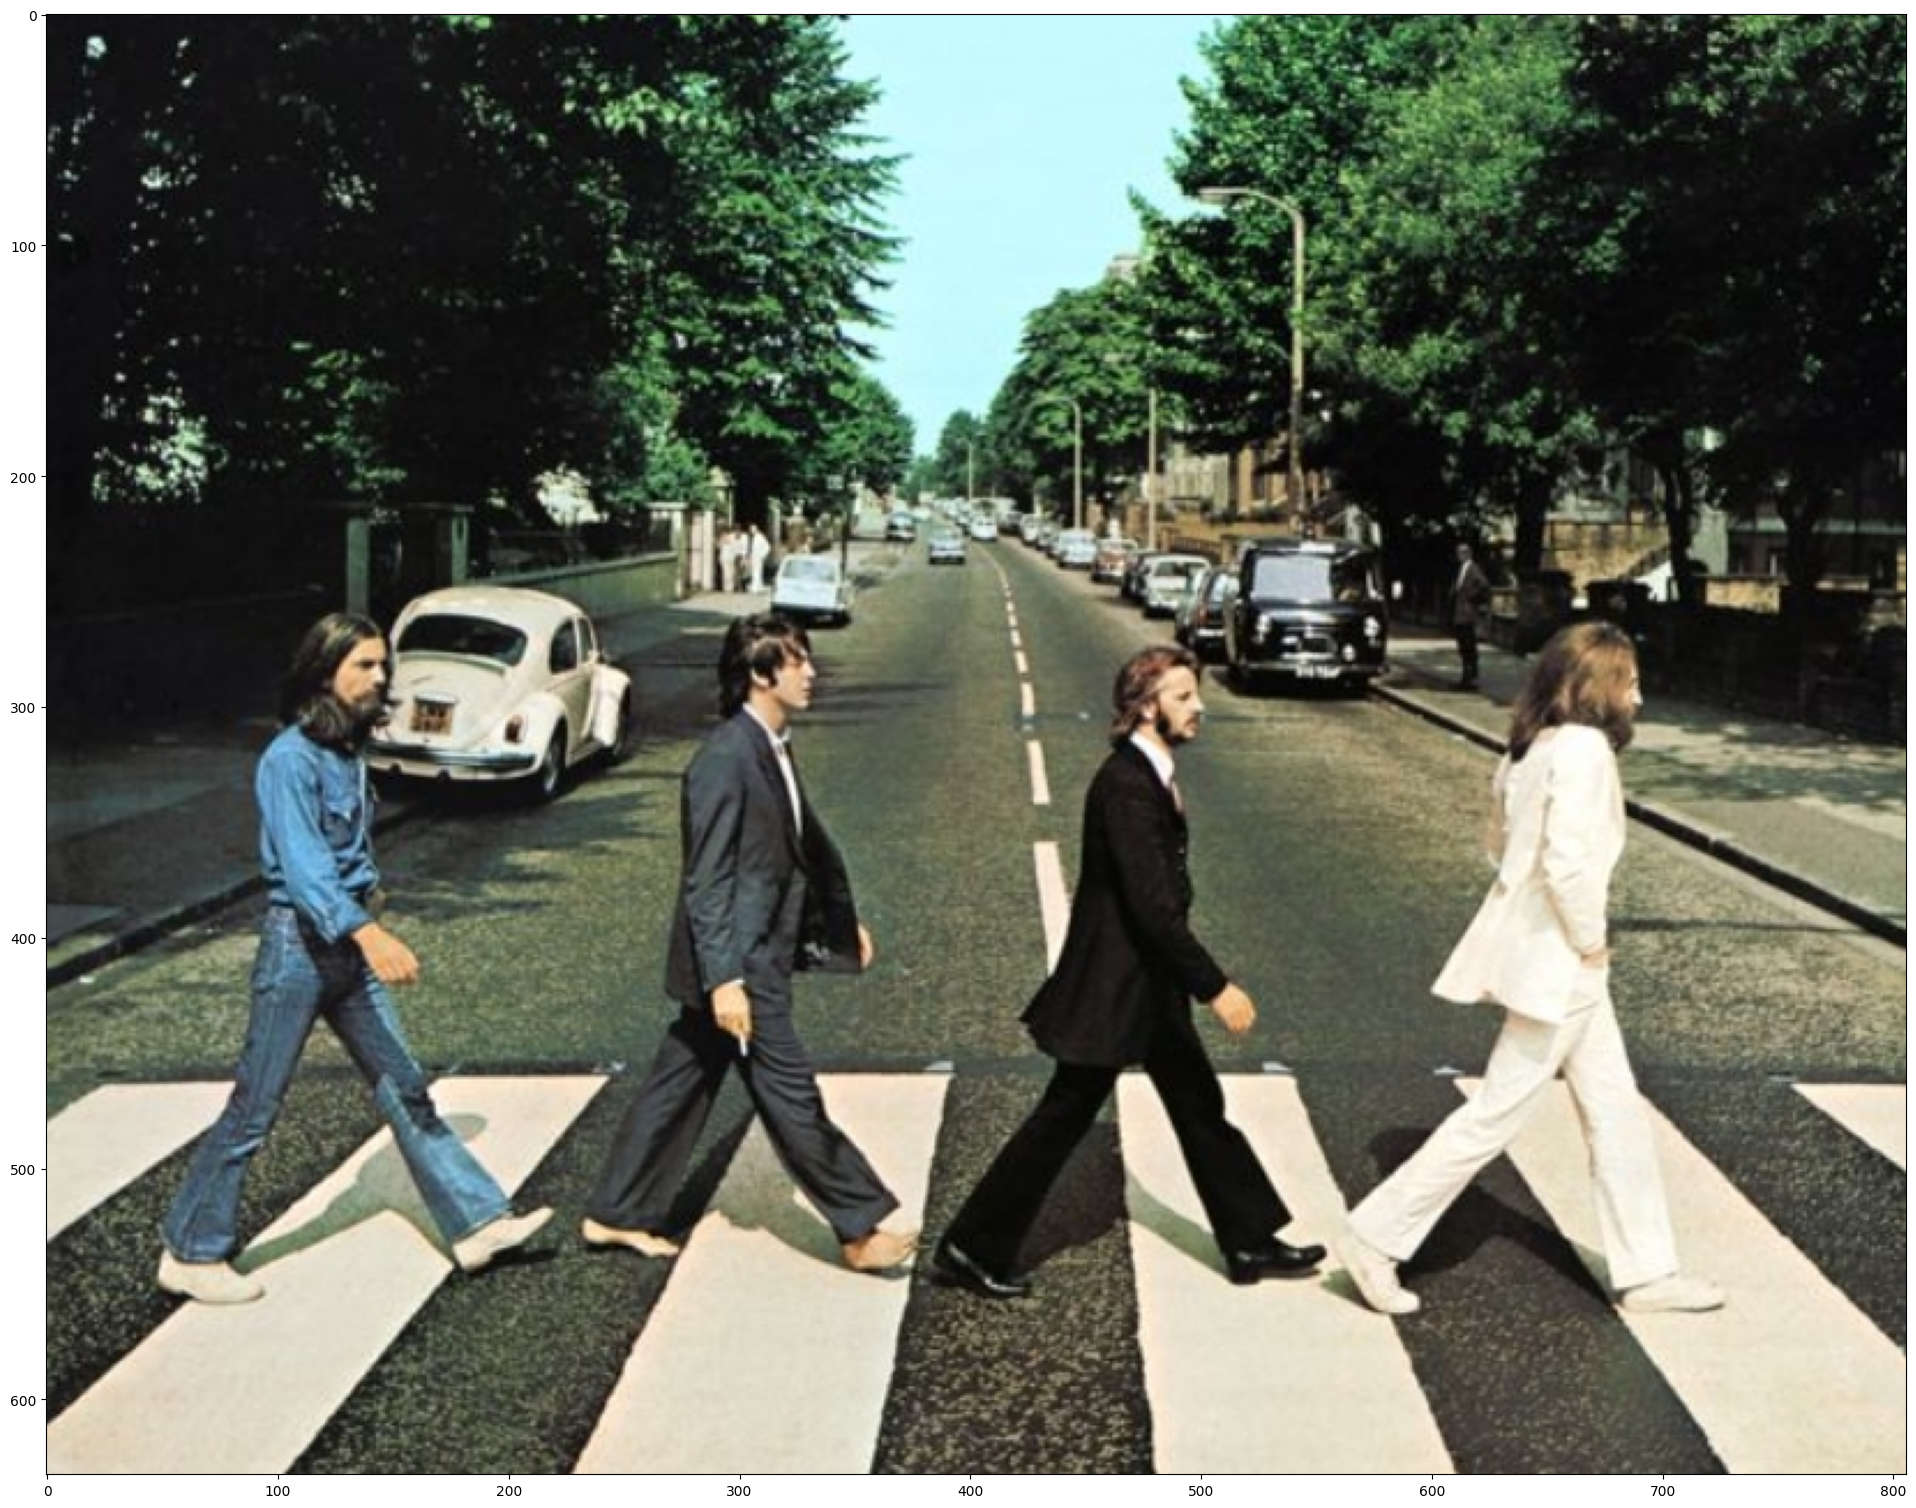

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/beatles01.jpg"
image_np = load_image_into_numpy_array(image_path)

plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

**추론하기**

In [ ]:
# running inference
# hub_model: 위에서 선택한 모델로 불러오도록 코드 구성
# hub_model에서 이미지는 4채널로 선언해주어야 함. 따라서 맨 앞에 1차원 만들어줌
print(image_np.shape)    #이미지 크기 확인
results = hub_model(image_np)

# different object detection models have additional results
# all of them are explained in the documentation
# TF Hub 사용법: 모델의 결과값을 dict 형태로 선언하여 사용
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())    # 실제 값들이 어떻게 구성되어 있는지 보기 위한 출력

(1, 633, 806, 3)
dict_keys(['detection_multiclass_scores', 'num_detections', 'detection_classes', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_scores', 'detection_boxes', 'raw_detection_scores'])


**결과 시각화하기**

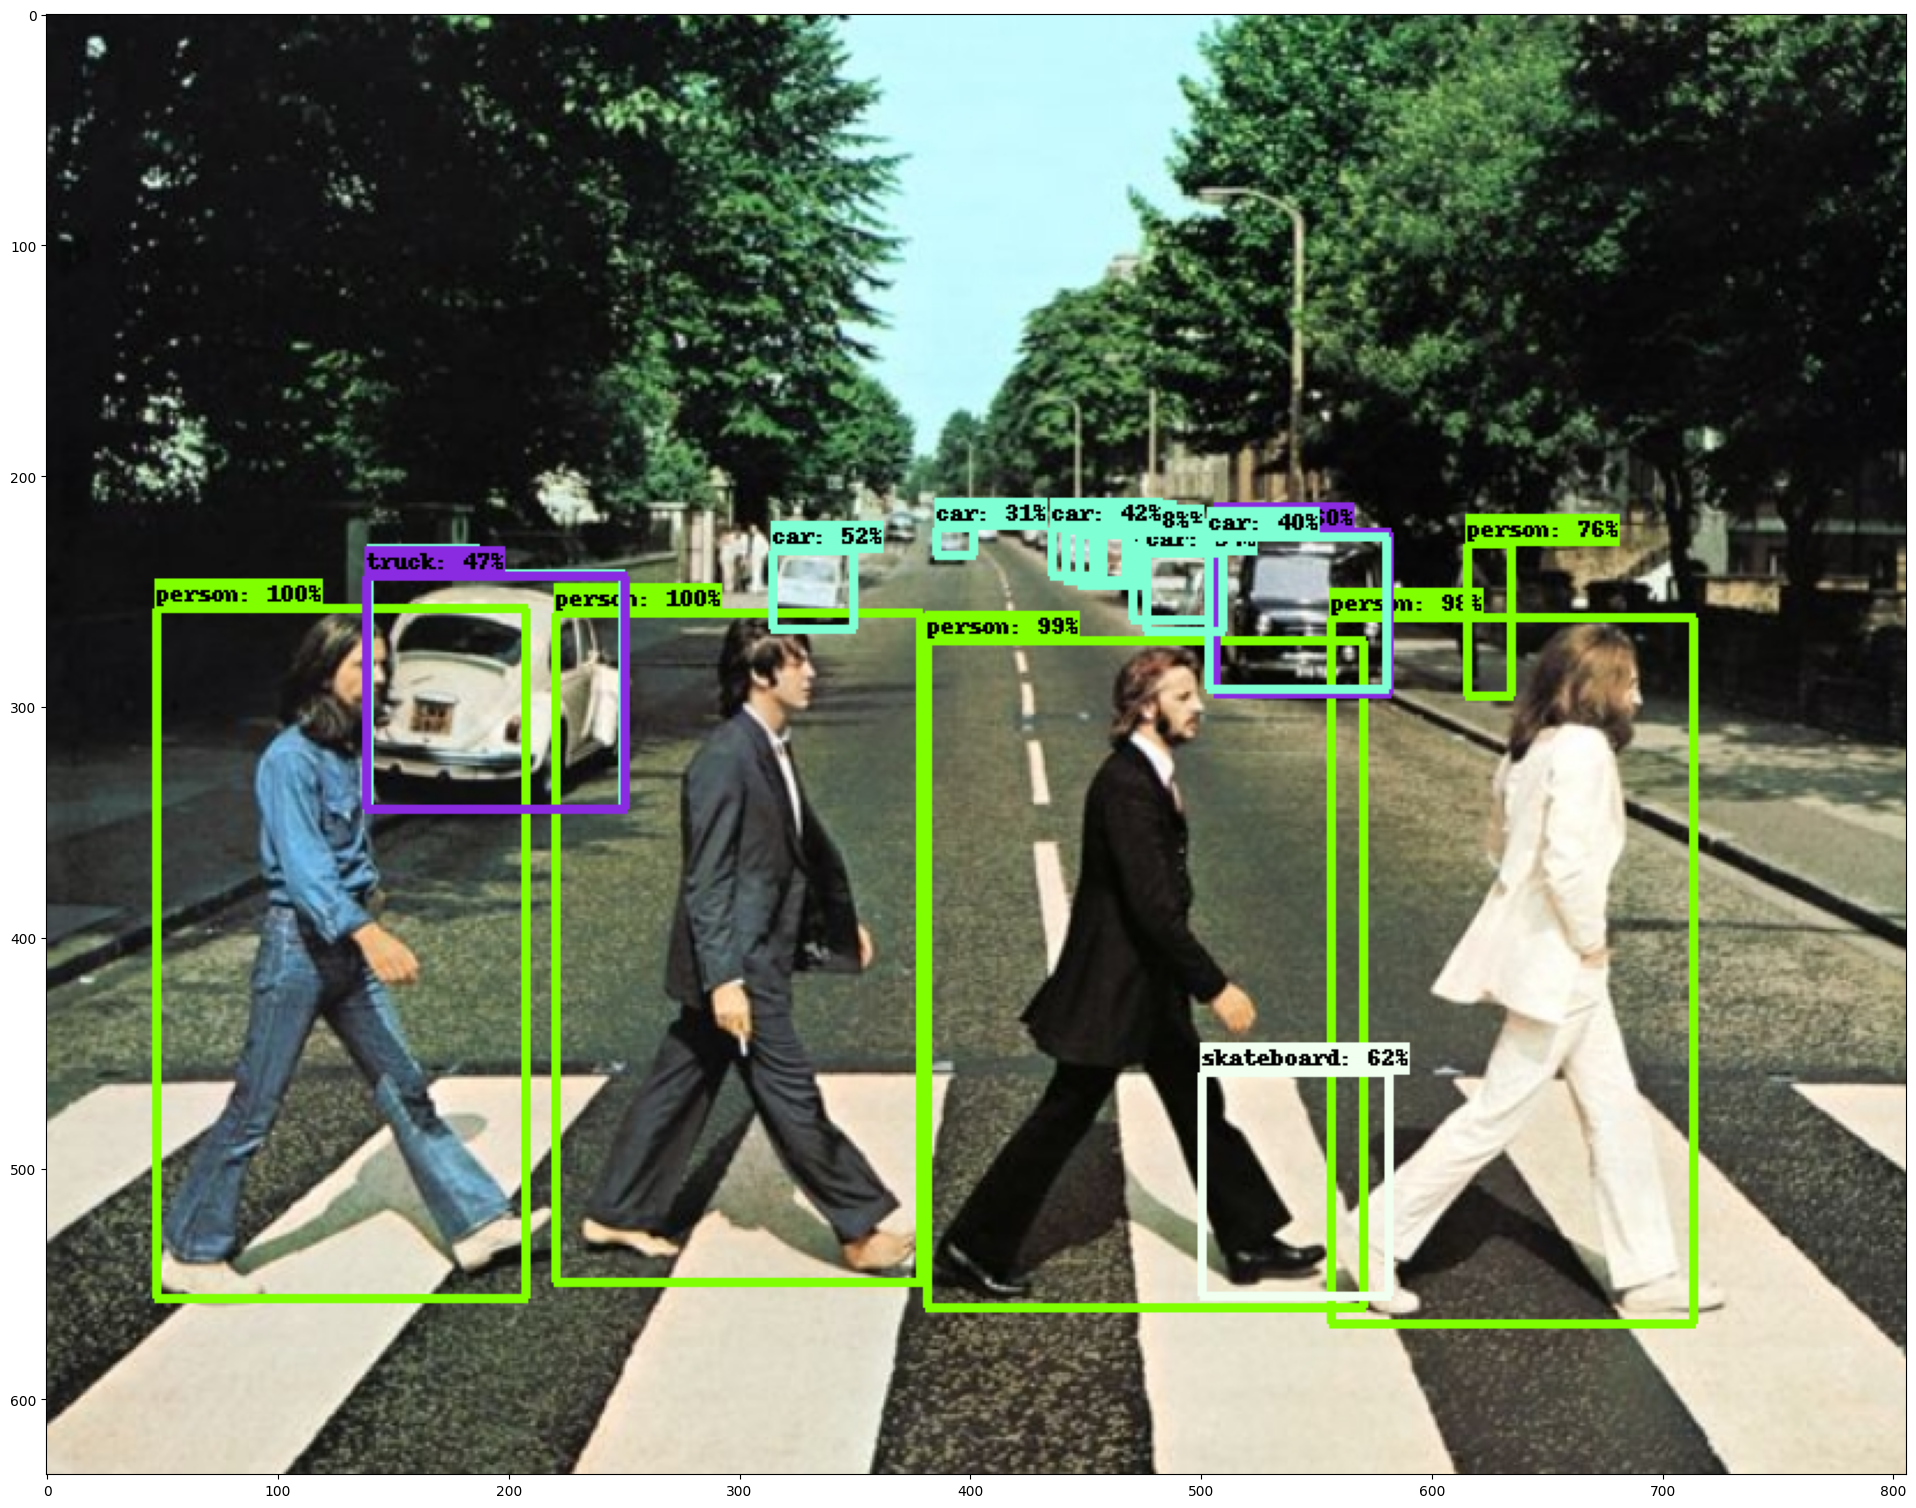

In [ ]:
label_id_offset = 0
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:
  keypoints = result['detection_keypoints'][0]
  keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
              # 함수 내부에서 원본 이미지의 크기 확인 및 화면에 그리는 이미지 선언
              # 모델 종류에 상관없이 이미지 크기는 원본 그대로 넣어도 된다.
              # 자동으로 /255 계산과, resize 코드가 내장되어 있다.
              # 원본 이미지값을 사용해야 나중에 화면에 표시할때 원본 크기로 계산할때 필요하기 때문
      result['detection_boxes'][0],                                   # 사각형 좌표 들
      (result['detection_classes'][0] + label_id_offset).astype(int), # Class 종류
      result['detection_scores'][0],                                  # 각 사각형에 대한 object인 확률 (0~1 사이)
      category_index,                                                 # category 종류를 넣어주면 출력한 class 숫자를 category_index[class]로 출력해준다.
      use_normalized_coordinates=True,                                # max_boxes_to_draw와 min_score_thresh 사용여부
      max_boxes_to_draw=200,                                          # 최대 200개까지 그림
      min_score_thresh=.30,                                           # score값이 0.3이하면 제거
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)


plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()

**OpenCV로 비디오 영상 읽기 쓰기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2

video_input_path = "/content/drive/MyDrive/Colab Notebooks/balloon_dog01.mp4"
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요.
video_output_path = "/content/drive/MyDrive/Colab Notebooks/balloon_dog01_result.avi"

# 동영상 불러오기
cap = cv2.VideoCapture(video_input_path)

# avi 코덱 선언
codec = cv2.VideoWriter_fourcc(*'XVID')
# 동영상 이미지 가로 크기
width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# 동영상 이미지 세로 크기
height = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
# 동영상 초당 영상 재생 개수
vid_fps = cap.get(cv2.CAP_PROP_FPS)
# 동영상 저장용 선언
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

# 동영상 총 이미지 갯수=총 frame 갯수
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)
print('fps:',vid_fps)
print('총 시간:', int(frame_cnt/vid_fps),'초 = ', int(frame_cnt/vid_fps/60),'분', int(frame_cnt/vid_fps)%60,'초')
print('가로:', width, '세로:', height)

# 동영상에서 불필요한 장면을 스킵 하기 위해서 비디오 시작지점을 설정한다.
# cap.set(cv2.CAP_PROP_POS_FRAMES, 40*vid_fps)

총 Frame 갯수: 314
fps: 30.0
총 시간: 10 초 =  0 분 10 초
가로: 544 세로: 676


In [ ]:
import time

In [ ]:
def get_hub_model_result(image, _model):
  # _model은 위에서 선택한 모델로 불러오도록 코드를 구성
  # 선택한 모델로 찾을 image와 box와 labeling할 이미지
  start = time.time()
  results = _model(image)
  end = time.time()
  print(end-start)

  # different object detection models have additional results
  # all of them are explained in the documentation
  # tensorflow hub의 사용법은 모델의 결과값을 dict형태로 선언해서 사용하기 때문에 아래 형태로 선언
  result = {key:value.numpy() for key,value in results.items()}
  # 시작이 1 인지 0 인지 차이를 선언
  label_id_offset = 0

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image[0],  # 함수 내부에서 원본 이미지의 크기 확인 및 화면에 그리는 이미지 선언
                 # 모델 종류에 상관없이 이미지 크기는 원본 그대로 넣어도 된다.
                 # 자동으로 /255 계산과, resize 코드가 내장되어 있다.
                 # 원본 이미지값을 사용해야 나중에 화면에 표시할때 원본 크기로 계산할때 필요하기 때문
      result['detection_boxes'][0],  # 사각형 좌표 들
      (result['detection_classes'][0] + label_id_offset).astype(int),  # class 종류
      result['detection_scores'][0],  # 각 사각형에 대한 object인 확률 (0~1 사이)
      category_index,  # category 종류를 넣어주면 출력한 class 숫자를 category_index[class]로 출력해준다.
      use_normalized_coordinates=True, # max_boxes_to_draw와 min_score_thresh 사용여부
      max_boxes_to_draw=200,  # 최대 200개 까지 그린다.
      min_score_thresh=.30,  # score값이 0.3 이하는 제거
      agnostic_mode=False,  # True일 경우 score만 표시, clas 표시 안함, 기본은 False
      # 아래는 해당 값이 있으면 사용함
   )
  return image[0]

In [ ]:
frame_count = 0
while True:
  hasFrame, img_frame = cap.read()
  print('frame count', frame_count)
  if not hasFrame:
    print('더 이상 처리할 frame이 없습니다.')
    break

  # hub_model에서는 이미지는 4체널로 선언해줘야 하기 때문에 앞에 1차원을 만들어줌
  test_img = np.array(img_frame).reshape((1, height, width, 3)).astype(np.uint8)
  # test_img : 테스트할 이미지, hub_model : 테스트할 모델
  draw_img_frame  = get_hub_model_result(test_img, hub_model)
  # 동영상중에서 1개의 frame 이미지를 진행했다는 count 표시용
  frame_count += 1

  # 아래는 확인용 코드
  # plt.figure(figsize=(24,32))  # 크게 보고싶으면 코드 주석 제거
  # plt.imshow(draw_img_frame)
  # plt.show()
  vid_writer.write(draw_img_frame)

  # 너무 많이 저장하면 오래걸리기 때문에 짧은 시간안에 테스트 할정도로 설정
  if frame_count > 50: break

vid_writer.release()
cap.release()

frame count 0
3.0218091011047363
frame count 1
4.0786824226379395
frame count 2
3.871175765991211
frame count 3
2.8947455883026123
frame count 4
2.918729305267334
frame count 5
2.8648033142089844
frame count 6
3.80078125
frame count 7
4.102818965911865
frame count 8
3.0676326751708984
frame count 9
4.710423469543457
frame count 10
4.377649784088135
frame count 11
5.083380699157715
frame count 12
6.846402883529663
frame count 13
3.342043161392212
frame count 14
3.0397117137908936
frame count 15
3.0705976486206055
frame count 16
4.015629053115845
frame count 17
4.022579908370972
frame count 18
3.202988624572754
frame count 19
3.0012717247009277
frame count 20
2.990245819091797
frame count 21
3.4617230892181396
frame count 22
4.219925403594971
frame count 23
3.5279381275177
frame count 24
2.9899158477783203
frame count 25
2.957796335220337
frame count 26
3.226585626602173
frame count 27
4.176207065582275
frame count 28
3.8240270614624023
frame count 29
2.9919674396514893
frame count 30
2.